# Notebook Intro:

In this notebook, I use my cleaned training data, then focus only on the ordinal features.

**Note: This notebook deals primarily with ordinal features. See notebook 3a for addressing nominal features (also known as categorical features), and notebook 5 for addressing continuous and discrete features**

Using the data dictionary, I updated the values for each feature with a ranked number.  I do this first for the training data, then export so other notebooks can use this file.  I also perform some EDA on the training data.

Finally, I update the values in the test data and export for analysis in another notebook.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# import cleaned training data
filepath = '../datasets/interim_files/train_clean.csv'

df = pd.read_csv(filepath)

In [3]:
# from notebook 3, 
ordinal_features = ['Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond','Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC','Electrical','Kitchen Qual','Functional','Fireplace Qu','Garage Finish','Garage Qual','Garage Cond','Paved Drive','Pool QC','Fence']

In [4]:
df[ordinal_features].head()

,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,...,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence
0,IR1,AllPub,Gtl,6,8,Gd,TA,TA,TA,No,...,SBrkr,Gd,Typ,none,RFn,TA,TA,Y,none,none
1,IR1,AllPub,Gtl,7,5,Gd,TA,Gd,TA,No,...,SBrkr,Gd,Typ,TA,RFn,TA,TA,Y,none,none
2,Reg,AllPub,Gtl,5,7,TA,Gd,TA,TA,No,...,SBrkr,Gd,Typ,none,Unf,TA,TA,Y,none,none
3,Reg,AllPub,Gtl,5,5,TA,TA,Gd,TA,No,...,SBrkr,TA,Typ,none,Fin,TA,TA,Y,none,none
4,IR1,AllPub,Gtl,6,8,TA,TA,Fa,Gd,No,...,SBrkr,TA,Typ,none,Unf,TA,TA,N,none,none


## Dictionaries for Ordinal Entries

### Dictionary for columns with entries of Ex/Gd/Ta/Fa/Po/NA


Group dictionarys with Ex/Gd/Ta/Fa/Po/NA. as 5,4,3,2,1

 {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0}
 
    
    Exter Qual (Ordinal): Evaluates the quality of the material on the exterior 
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
    Exter Cond (Ordinal): Evaluates the present condition of the material on the exterior		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
    
    Bsmt Qual (Ordinal): Evaluates the height of the basement
       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
    Bsmt Cond (Ordinal): Evaluates the general condition of the basement
       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
                                 
    HeatingQC (Ordinal): Heating quality and condition
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor		               
                  
     KitchenQual (Ordinal): Kitchen quality
       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
    
    FireplaceQu (Ordinal): Fireplace quality
       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace      
                          
    Garage Qual (Ordinal): Garage quality
       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
    Garage Cond (Ordinal): Garage condition
       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage


    Pool QC (Ordinal): Pool quality		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

In [5]:
dict_for_egtfp = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0}

columns_with_egtfp = ['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Pool QC']

#updates entries in a set of columns with a given dictionary
def upd_col_values(df,columns1,dict1):
    for column in columns1:
        df[column] = df[column].map(dict1)
    return df
    
df2 = upd_col_values(df,columns_with_egtfp,dict_for_egtfp)
df2[columns_with_egtfp]

,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC
0,4,3,3,3,5,4,0,3,3,0
1,4,3,4,3,5,4,3,3,3,0
2,3,4,3,3,3,4,0,3,3,0
3,3,3,4,3,4,3,0,3,3,0
4,3,3,2,4,3,3,0,3,3,0
...,...,...,...,...,...,...,...,...,...,...
2021,4,3,4,3,5,4,4,3,3,0
2022,3,3,3,3,5,3,0,3,3,0
2023,3,3,3,3,4,3,3,2,2,0
2024,3,3,3,3,3,3,4,3,3,0


In [6]:
df2[columns_with_egtfp].isnull().sum()

Exter Qual      0
Exter Cond      0
Bsmt Qual       0
Bsmt Cond       0
Heating QC      0
Kitchen Qual    0
Fireplace Qu    0
Garage Qual     0
Garage Cond     0
Pool QC         0
dtype: int64

### Create dictionaries for remaining columns with ordinal entries

In [7]:
# in general, give all dict values order of decreasing value (based on order of data dictionary).  
# Start with 0 as lowest value if none is an option.  
# Otherwise, start with 1 - then in case of any missing values, those can be assigned as 0

dict_lot_shape = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1}

#     Lot Shape (Ordinal): General shape of property

#        Reg	Regular	
#        IR1	Slightly irregular
#        IR2	Moderately Irregular
#        IR3	Irregular
    
dict_util = {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1}    
    
#     Utilities (Ordinal): Type of utilities available

#        AllPub	All public Utilities (E,G,W,& S)	
#        NoSewr	Electricity, Gas, and Water (Septic Tank)
#        NoSeWa	Electricity and Gas Only
#        ELO	Electricity only	

dict_ls = {'Gtl': 3, 'Mod': 2, 'Sev':1}

#     Land Slope (Ordinal): Slope of property

#        Gtl	Gentle slope
#        Mod	Moderate Slope	
#        Sev	Severe Slope

dict_be = {'Gd': 4, 'Av': 3, 'Mn':2, 'No':1, 'none':0}

#    Bsmt Exposure	(Ordinal): Refers to walkout or garden level walls

#        Gd	Good Exposure
#        Av	Average Exposure (split levels or foyers typically score average or above)	
#        Mn	Mimimum Exposure
#        No	No Exposure
#        NA	No Basement

dict_bft = {'GLQ':6,'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'none':0}
    
#      BsmtFin Type 1	(Ordinal): Rating of basement finished area

#        GLQ	Good Living Quarters
#        ALQ	Average Living Quarters
#        BLQ	Below Average Living Quarters	
#        Rec	Average Rec Room
#        LwQ	Low Quality
#        Unf	Unfinshed
#        NA	No Basement
                  
#     BsmtFinType 2	(Ordinal): Rating of basement finished area (if multiple types)

#        GLQ	Good Living Quarters
#        ALQ	Average Living Quarters
#        BLQ	Below Average Living Quarters	
#        Rec	Average Rec Room
#        LwQ	Low Quality
#        Unf	Unfinshed
#        NA	No Basement
    
   
dict_elec = {'SBrkr':5 ,'FuseA':4 ,'FuseF':3 ,'FuseP':2 ,'Mix':1 }

#     Electrical (Ordinal): Electrical system

#        SBrkr	Standard Circuit Breakers & Romex
#        FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
#        FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
#        FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
#        Mix	Mixed

dict_func = {'Typ':8 ,'Min1':7 ,'Min2':6 ,'Mod':5 ,'Maj1':4 ,'Maj2':3 ,'Sev':2 ,'Sal':1 }

#     Functional (Ordinal): Home functionality (Assume typical unless deductions are warranted)

#        Typ	Typical Functionality
#        Min1	Minor Deductions 1
#        Min2	Minor Deductions 2
#        Mod	Moderate Deductions
#        Maj1	Major Deductions 1
#        Maj2	Major Deductions 2
#        Sev	Severely Damaged
#        Sal	Salvage only	
  
dict_fin = {'Fin':3,'RFn':2, 'Unf':1,'none':0}   
    
#     Garage Finish (Ordinal)	: Interior finish of the garage

#        Fin	Finished
#        RFn	Rough Finished	
#        Unf	Unfinished
#        NA	No Garage
    
dict_drive = {'Y':3,'P':2,'N':1}    
    
#     Paved Drive (Ordinal): Paved driveway

#        Y	Paved 
#        P	Partial Pavement
#        N	Dirt/Gravel
    
dict_fence = {'GdPrv':4 ,'MnPrv':3 ,'GdWo':2 ,'MnWw':1 ,'none':0 }   
    
#     Fence (Ordinal): Fence quality
		
#        GdPrv	Good Privacy
#        MnPrv	Minimum Privacy
#        GdWo	Good Wood
#        MnWw	Minimum Wood/Wire
#        NA	No Fence

In [8]:
#Create a list of columns with their associated dictionaries to update:
    
columns_to_update = ['Lot Shape','Utilities','Land Slope','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Electrical','Functional','Garage Finish','Paved Drive','Fence']
dict_for_update = [dict_lot_shape,dict_util,dict_ls,dict_be,dict_bft,dict_bft,dict_elec,dict_func,dict_fin,dict_drive,dict_fence ]   
    
dict_of_cols_and_dict = dict(zip(columns_to_update,dict_for_update))
#dict_of_cols_and_dict

In [9]:
#updates entries in a set of columns with a given dictionary
    
def upd_mult_col_values(df,col_names,dict_names):
    for i in range(len(col_names)):
        df[col_names[i]] = df[col_names[i]].map(dict_names[i])
    return df    
    
final_df = upd_mult_col_values(df,columns_to_update,dict_for_update)


## Confirm all ordinal columns look ok

In [10]:
final_df[ordinal_features].head()

,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,...,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence
0,3,4,3,6,8,4,3,3,3,1,...,5,4,8,0,2,3,3,3,0,0
1,3,4,3,7,5,4,3,4,3,1,...,5,4,8,3,2,3,3,3,0,0
2,4,4,3,5,7,3,4,3,3,1,...,5,4,8,0,1,3,3,3,0,0
3,4,4,3,5,5,3,3,4,3,1,...,5,3,8,0,3,3,3,3,0,0
4,3,4,3,6,8,3,3,2,4,1,...,5,3,8,0,1,3,3,1,0,0


In [11]:
final_df[ordinal_features].isnull().sum()

Lot Shape         0
Utilities         0
Land Slope        0
Overall Qual      0
Overall Cond      0
Exter Qual        0
Exter Cond        0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin Type 2    0
Heating QC        0
Electrical        0
Kitchen Qual      0
Functional        0
Fireplace Qu      0
Garage Finish     0
Garage Qual       0
Garage Cond       0
Paved Drive       0
Pool QC           0
Fence             0
dtype: int64

These don't need dictionaries since they already have values

  Overall Qual (Ordinal): Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
    Overall Cond (Ordinal): Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
    

In [12]:
# export columns with final_df[ordinal_features] as csv

filepath = '../datasets/interim_files/training_updated_ordinal_features.csv'

final_df[ordinal_features].to_csv(filepath,index=False)

# explore correlations to sale price

In [13]:
corrs = pd.concat([final_df[ordinal_features],final_df['SalePrice']], axis = 1).corr()['SalePrice']

In [14]:
corrs_columns = corrs[np.abs(corrs)>.2]

In [15]:
corrs_columns.index

Index(['Lot Shape', 'Overall Qual', 'Exter Qual', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'Heating QC', 'Electrical',
       'Kitchen Qual', 'Fireplace Qu', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'SalePrice'],
      dtype='object')

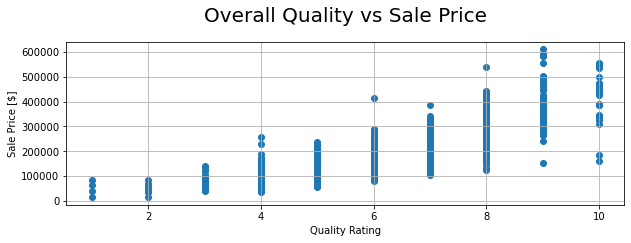

In [16]:
# Size
plt.figure(figsize = (10,3))

# Scatter plot
plt.scatter(final_df['Overall Qual'],final_df['SalePrice'])


# Create a descriptive title
plt.title('Overall Quality vs Sale Price',fontdict = {'fontsize': 20}, pad = 20)

# Add axis labels
plt.xlabel('Quality Rating')
plt.ylabel('Sale Price [$]');
plt.grid(True)

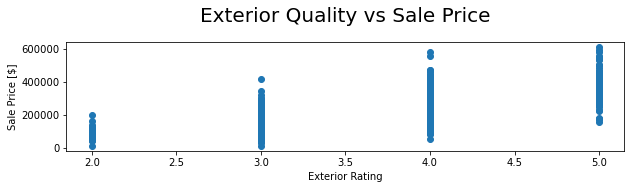

In [17]:
# Size
plt.figure(figsize = (10,2))

# Scatter plot
plt.scatter(final_df['Exter Qual'],final_df['SalePrice'])


# Create a descriptive title
plt.title('Exterior Quality vs Sale Price',fontdict = {'fontsize': 20}, pad = 20)

# Add axis labels
plt.xlabel('Exterior Rating')
plt.ylabel('Sale Price [$]');
plt.grid(False)

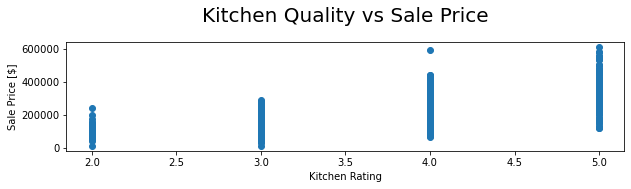

In [18]:
# Size
plt.figure(figsize = (10,2))

# Scatter plot
plt.scatter(final_df['Kitchen Qual'],final_df['SalePrice'])


# Create a descriptive title
plt.title('Kitchen Quality vs Sale Price',fontdict = {'fontsize': 20}, pad = 20)

# Add axis labels
plt.xlabel('Kitchen Rating')
plt.ylabel('Sale Price [$]');
plt.grid(False)

# convert test data

In [19]:
# import cleaned test info
filepath = '../datasets/interim_files/test_clean.csv'

testdata = pd.read_csv(filepath)
testdata.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,none,none,none,0,4,2006,WD
1,2718,905108090,90,RL,0.0,9662,Pave,none,IR1,Lvl,...,0,0,0,none,none,none,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,none,IR1,Lvl,...,0,0,0,none,none,none,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,none,Reg,Lvl,...,0,0,0,none,none,none,0,7,2007,WD
4,625,535105100,20,RL,0.0,9500,Pave,none,IR1,Lvl,...,0,185,0,none,none,none,0,7,2009,WD


In [20]:
testdata2 = upd_col_values(testdata,columns_with_egtfp,dict_for_egtfp)
testdata2[columns_with_egtfp]
testdata2[columns_with_egtfp].isnull().sum()

Exter Qual      0
Exter Cond      0
Bsmt Qual       0
Bsmt Cond       0
Heating QC      0
Kitchen Qual    0
Fireplace Qu    0
Garage Qual     0
Garage Cond     0
Pool QC         0
dtype: int64

In [21]:
final_testdata = upd_mult_col_values(testdata,columns_to_update,dict_for_update)

In [22]:
final_testdata[ordinal_features].head()

,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,...,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence
0,4,4,3,6,8,3,2,2,3,1,...,2.0,2,8,0,1,1,1,3,0,0
1,3,4,3,5,4,3,3,4,3,1,...,5.0,3,8,0,3,3,3,3,0,0
2,3,4,3,7,5,4,3,4,4,3,...,5.0,4,8,4,2,3,3,3,0,0
3,4,4,3,5,6,4,3,3,3,1,...,5.0,3,8,0,1,2,3,1,0,0
4,3,4,3,6,5,3,3,4,3,1,...,5.0,3,8,4,2,3,3,3,0,0


In [23]:
final_testdata[ordinal_features].isnull().sum()

Lot Shape         0
Utilities         0
Land Slope        0
Overall Qual      0
Overall Cond      0
Exter Qual        0
Exter Cond        0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin Type 2    0
Heating QC        0
Electrical        1
Kitchen Qual      0
Functional        0
Fireplace Qu      0
Garage Finish     0
Garage Qual       0
Garage Cond       0
Paved Drive       0
Pool QC           0
Fence             0
dtype: int64

In [24]:
final_testdata = final_testdata[ordinal_features].fillna(0)

In [25]:
final_testdata.head()

,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,...,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence
0,4,4,3,6,8,3,2,2,3,1,...,2.0,2,8,0,1,1,1,3,0,0
1,3,4,3,5,4,3,3,4,3,1,...,5.0,3,8,0,3,3,3,3,0,0
2,3,4,3,7,5,4,3,4,4,3,...,5.0,4,8,4,2,3,3,3,0,0
3,4,4,3,5,6,4,3,3,3,1,...,5.0,3,8,0,1,2,3,1,0,0
4,3,4,3,6,5,3,3,4,3,1,...,5.0,3,8,4,2,3,3,3,0,0


In [26]:
# export columns with final_df[ordinal_features] as csv

filepath = '../datasets/Interim_files/testdata_updated_ordinal_features.csv'

final_testdata.to_csv(filepath,index=False)

# Notebook Summary:

In this notebook, I use my cleaned training data, then focus only on the ordinal features.

Using the data dictionary, I updated the values for each feature with a ranked number.  I do this first for the training data, then export so other notebooks can use this file.  I also perform some EDA on the training data.

Finally, I update the values in the test data and export for analysis in another notebook.